# Proyecto Introducción a la Ciencia de los Datos
**José Barrios - 20007192**

## Descripción general
El proyecto consiste en aplicar los conocimientos aprendidos en clase (y apoyándose de referencias adicionales útiles) para crear modelos predictivos de regresión lineal uni-variable sencillos de la forma:
> y = f(x) = mx +b

Donde:
<br>y = la variable dependiente
<br>x = variable independiente
<br>m = pendiente de la recta(parámetro del modelo)
<br>b = intercepto(parámetro del modelo)

Tanto “x” como “y” son parte del dataset usado , “m” y “b” son parámetros del modelo los cuales buscamos estimar con los datos, esto significa que se busca encontrar que valores de “m” y “b” producen una recta que describa de la mejor manera posible la relación entre los datos "x" y "y".

### Pasos solicitados
Los datos se encuentran dados en el formato binario de NumPy .npy por lo tanto usaremos la función “load” de numpy para poderlos utilizar:
https://docs.scipy.org/doc/numpy/reference/generated/numpy.load.html

Instalar Numpy, Pandas, Seaborn para el notebook

In [182]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data = np.load('proyecto_training_data.npy')

In [3]:
#'Revolvemos' la data para minimizar algún tipo de sesgo
#Esto reordena las filas, pero los valores en cada columna siguen siendo los mismos
np.random.shuffle(data)
data

array([[1.6000e+05, 6.0000e+00, 1.1160e+03, 5.0000e+00, 1.9620e+03,
        8.7000e+01],
       [1.4700e+05, 8.0000e+00, 1.7950e+03, 7.0000e+00, 2.0060e+03,
        7.5000e+01],
       [1.3500e+05, 5.0000e+00, 1.0480e+03, 6.0000e+00, 1.9560e+03,
        7.2000e+01],
       ...,
       [2.5900e+05, 7.0000e+00, 1.5300e+03, 7.0000e+00, 2.0040e+03,
        1.8200e+02],
       [1.2400e+05, 5.0000e+00, 1.0890e+03, 8.0000e+00, 1.8800e+03,
        5.0000e+01],
       [1.6175e+05, 6.0000e+00, 6.8900e+02, 6.0000e+00, 1.9770e+03,
               nan]])

In [4]:
data = pd.DataFrame(data = data, columns = ["SalePrice", "OverallQual","1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"])
data = data.astype({"SalePrice" : int, "OverallQual" : int, "1stFlrSF" : int, "TotRmsAbvGrd" : int, "YearBuilt" : int})
data.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,160000,6,1116,5,1962,87.0
1,147000,8,1795,7,2006,75.0
2,135000,5,1048,6,1956,72.0
3,87000,5,840,5,1930,55.0
4,128000,5,1063,6,1954,80.0


In [5]:
data.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


Procedemos a dividir la data en dos secciones: una para entrenamiento y otra para verificación del modelo.

Así que se procede a determinar cuántas filas tiene la data y así separar el 80% de ella para entrenamiento.

In [6]:
filas_entrenamiento = int(len(data) * 0.8)

print("Forma o tamaño: ", data.shape)
print("Filas para entrenamiento: ", filas_entrenamiento)

Forma o tamaño:  (1460, 6)
Filas para entrenamiento:  1168


In [7]:
data_entrenamiento = data[:filas_entrenamiento]

print("Forma o tamaño de data de entrenamiento: ", data_entrenamiento.shape)

Forma o tamaño de data de entrenamiento:  (1168, 6)


In [134]:
data_validacion = data[filas_entrenamiento:]

print("Forma o tamaño de data de validación: ", data_validacion.shape)

Forma o tamaño de data de validación:  (292, 6)


## Análisis exploratorio
Usando numpy, calcular los siguientes valores de cada variable de la data.
* Media
* Valor máximo
* Valor mínimo
* Rango
* Desviación estándar

In [8]:
media = np.nanmean(data_entrenamiento, axis=0)
maximo = np.nanmax(data_entrenamiento, axis=0)
minimo = np.nanmin(data_entrenamiento, axis=0)
rango = maximo - minimo
destandar = np.nanstd(data_entrenamiento, axis=0)

for i in range(len(media)):
    print('******************************************')
    print(data_entrenamiento.columns[i])
    print('Media: ', media[i])
    print('Máximo: ', maximo[i])
    print('Mínimo: ', minimo[i])
    print('Rango: ', rango[i])
    print('Desviación estándar: ', destandar[i])

******************************************
SalePrice
Media:  179991.12243150684
Máximo:  755000.0
Mínimo:  35311.0
Rango:  719689.0
Desviación estándar:  79922.68715180086
******************************************
OverallQual
Media:  6.101883561643835
Máximo:  10.0
Mínimo:  1.0
Rango:  9.0
Desviación estándar:  1.3992646846379657
******************************************
1stFlrSF
Media:  1150.55051369863
Máximo:  3138.0
Mínimo:  372.0
Rango:  2766.0
Desviación estándar:  369.1140947107272
******************************************
TotRmsAbvGrd
Media:  6.52054794520548
Máximo:  14.0
Mínimo:  3.0
Rango:  11.0
Desviación estándar:  1.636355699024101
******************************************
YearBuilt
Media:  1971.4280821917807
Máximo:  2010.0
Mínimo:  1872.0
Rango:  138.0
Desviación estándar:  29.843110866413127
******************************************
LotFrontage
Media:  69.31217481789803
Máximo:  174.0
Mínimo:  21.0
Rango:  153.0
Desviación estándar:  21.712441648173012


Para cada variable en el dataset usar seaborn (función distplot https://seaborn.pydata.org/generated/seaborn.distplot.html) para graficar un histograma de la variable.

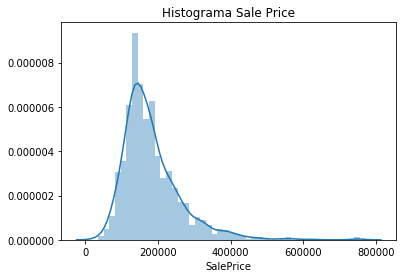

In [79]:
#SalePrice
sns.distplot(data_entrenamiento['SalePrice'])
plt.title('Histograma Sale Price')
plt.show()

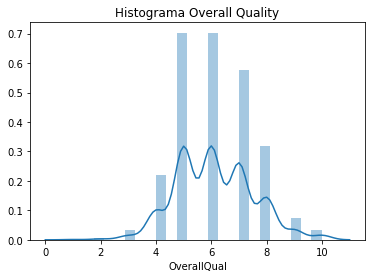

In [80]:
#OverallQual
sns.distplot(data_entrenamiento['OverallQual'])
plt.title('Histograma Overall Quality')
plt.show()

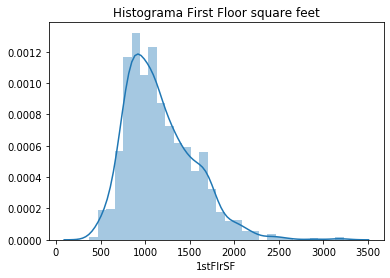

In [81]:
#1stFlrSF
sns.distplot(data_entrenamiento['1stFlrSF'])
plt.title('Histograma First Floor square feet')
plt.show()

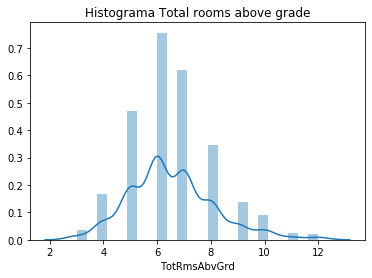

In [82]:
#TotRmsAbvGrd
sns.distplot(data_entrenamiento['TotRmsAbvGrd'])
plt.title('Histograma Total rooms above grade')
plt.show()

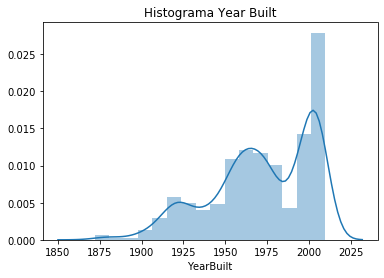

In [83]:
#YearBuilt
sns.distplot(data_entrenamiento['YearBuilt'])
plt.title('Histograma Year Built')
plt.show()

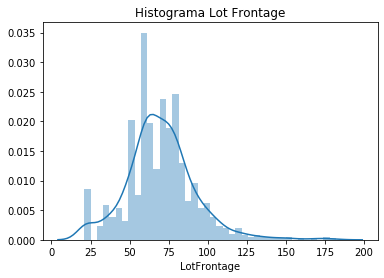

In [84]:
#LotFrontage
sns.distplot(data_entrenamiento['LotFrontage'])
plt.title('Histograma Lot Frontage')
plt.show()

### Correlación entre variables
Para cada variable independiente x:
* Calcular el coeficiente de correlación entre x y _y_ 
* Graficar x vs y (scatterplot) usando matplotlib
* Colocar el coeficiente de correlación y colocarlo como parte del título de la gráfica

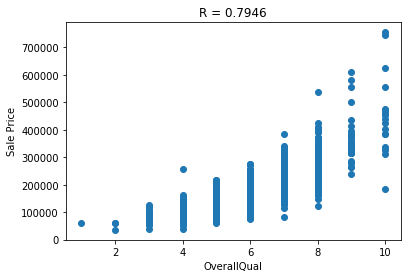

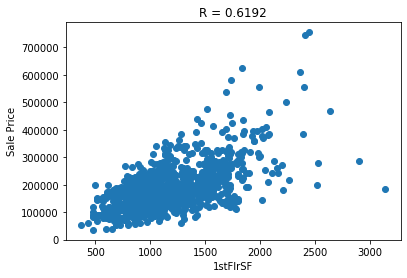

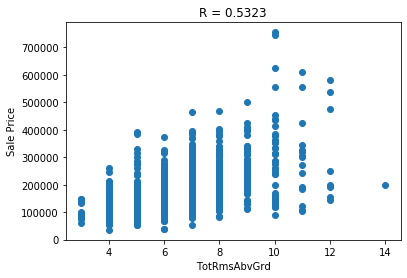

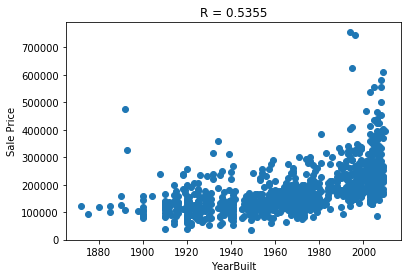

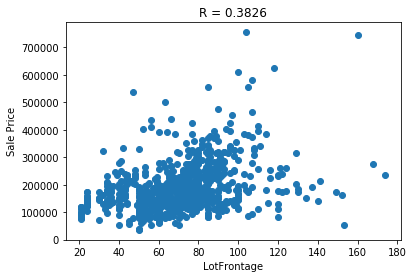

In [190]:
for col in data_entrenamiento.columns:
    if(col != 'SalePrice'):
        cor = round(data_entrenamiento['SalePrice'].corr(data_entrenamiento[col]),4)
        
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        ax.scatter(data_entrenamiento[col], data_entrenamiento["SalePrice"])
        ax.set_xlabel(col)
        ax.set_ylabel("Sale Price")
        ax.set_title('R = ' + str(cor))
        ax.set_aspect('auto')
    
plt.show()

## Variables seleccionadas
Según las correlaciones entre variables de la sección anterior, se seleccionan:
* OverallQual (R = 0.7946)
* 1stFlrSF    (R = 6192)

## Entrenamiento del modelo
Se crea una función para entrenar un modelo de regresión lineal de una variable
> y = mx +b

La función recibe como argumentos:
* Vector con  la variable independiente “x”
* Vector con la variable dependiente “y”
* Un entero “epochs” que indica por cuantas iteraciones entrenar el modelo
* Un entero  “imprimir_error_cada”, que nos indica cada cuantas iteraciones queremos imprimir a través de print : el número de iteración, el error del modelo en esa iteración, si imprimir_error_cada = 10, se despliega en pantalla el error en las iteraciones: 10,20,30,40,50
* Escalar lr (learning rate): es usado como parte de la expresión matemáticapara actualizar en cada iteración los parámetros del modelo.

In [170]:
def train_model(arr_x, arr_y, epochs, imprimir_error_cada, lr):
    m = 0.0
    b = 0.0
    x = np.vstack(arr_x) #Convertir la variable independiente a un array vertical
    y = np.array(arr_y) 
    
    matriz = np.hstack((x, np.ones_like(x))) #Matriz de dos columnas con n filas
    matrizh = np.transpose(matriz) #Matriz con 2 filas y n columnas
    
    parametros = np.array([m, b])
    errores = []
    dict_parametros = {}
    
    for i in range(1, epochs + 1):
        y_hat = np.dot(matriz, parametros)
        diferencia = y_hat - y
        
        error = 0.5 * (np.mean((diferencia)**2))
        errores.append(error)
        gradientes = (diferencia * matrizh).mean(1)
        
        parametros = parametros - (lr * gradientes)
        dict_parametros[i] = parametros
        
        if i % imprimir_error_cada == 0:
            print("Iteración ", i, "  Error: ",error)
            
    return errores, dict_parametros
        
        

In [161]:
train_model(data_entrenamiento['OverallQual'], data_entrenamiento['SalePrice'], 10, 5, 0.00001)

Iteración  5   Error:  19449969784.857597
Iteración  10   Error:  19522418198.10388


([19392220037.85916,
  19406640096.56114,
  19421071734.428207,
  19435514960.758503,
  19449969784.857597,
  19464436216.03854,
  19478914263.62188,
  19493403936.935627,
  19507905245.31529,
  19522418198.10388],
 {1: array([-11.87147717,  -1.79991122]),
  2: array([-23.74771672,  -3.60056483]),
  3: array([-35.62872055,  -5.40196112]),
  4: array([-47.51449057,  -7.20410039]),
  5: array([-59.4050287 ,  -9.00698293]),
  6: array([-71.30033685, -10.81060905]),
  7: array([-83.20041693, -12.61497904]),
  8: array([-95.10527087, -14.42009321]),
  9: array([-107.01490058,  -16.22595185]),
  10: array([-118.92930797,  -18.03255526])})

Crear una función que nos permita visualizar con matplotlib cómo cambia el error en el tiempo: crear una función que tome como parámetro el vector de erroresgenerados por la función de entrenamiento y grafique en el eje “x” el número deiteración y en el eje “y”  el error para esa iteración

In [186]:
def grafico_perdida(arr_x, arr_y):
    plt.plot(np.linspace(0, len(arr_y), len(arr_y)), arr_x)
    plt.title('Error por iteración')
    plt.xlabel('Iteración')
    plt.ylabel('Error')
    plt.show()

Iteración  50000   Error:  1757897520.3179643
Iteración  100000   Error:  1438247160.064931
Iteración  150000   Error:  1431256798.4896102
Iteración  200000   Error:  1429917653.2096303


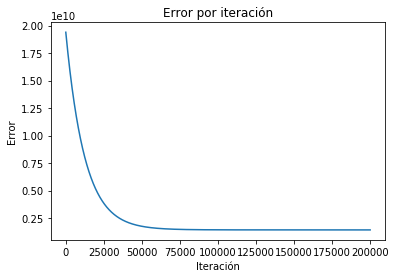

In [187]:
x_overall, y_overall = train_model(data_entrenamiento['OverallQual'], data_entrenamiento['SalePrice'], 200000, 50000, 0.000001)
grafico_perdida(x_overall, y_overall)

Iteración  5   Error:  2035111902.520297
Iteración  10   Error:  2000252254.7088447
Iteración  15   Error:  2000237434.1040943
Iteración  20   Error:  2000237398.9868398


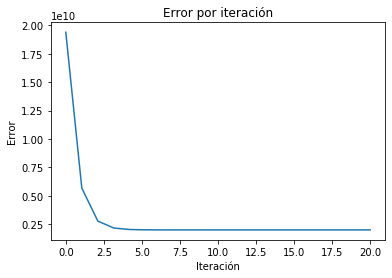

In [188]:
x_floor, y_floor = train_model(data_entrenamiento['1stFlrSF'], data_entrenamiento['SalePrice'], 20, 5, 0.000001)
grafico_perdida(x_floor, y_floor)

Crear una función que nos permita visualizar con matplotlib cómo evoluciona el modelo entrenado en el tiempo.

Crear una función que tome como parámetro la estructura de datos conteniendo el historial de modelos, y un valor “n” que indicacada cuantas iteraciones graficar el modelo resultante, por ejemplo para n=3 la función debe graficar la recta correspondiente al modelo junto a los datos cada 3 iteraciones, si se ejecutaron 15 iteraciones, para n = 3 se grafica el modelo de las iteraciones 3,6,9,12,15 junto con los datos de entrenamiento.

In [168]:
def grafico_regresion(x, y, recta, n):
    x1 = np.linspace(0,np.max(x), 100)
    for i in range(1, len(recta), n):
        fx = recta[i+1][0] * x1 + recta[i+1][1]
        plt.scatter(x,y)
        plt.plot(x1, fx, 'r')
        plt.title("Iteración: " + str(i))
        plt.xlabel(str(x.name))
        plt.ylabel(str(y.name))
        plt.show()

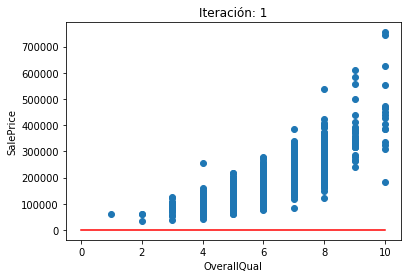

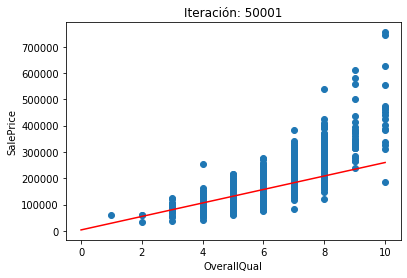

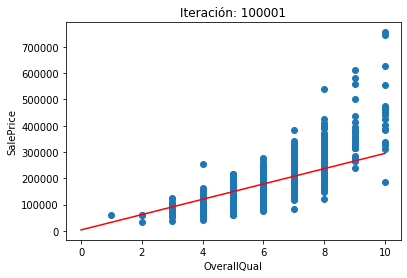

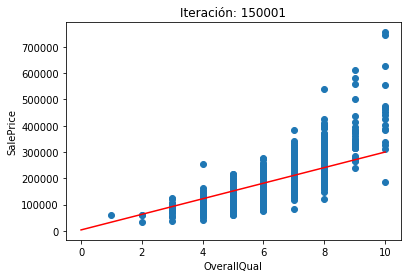

In [173]:
grafico_regresion(data_entrenamiento['OverallQual'], data_entrenamiento['SalePrice'], y_overall, 50000)

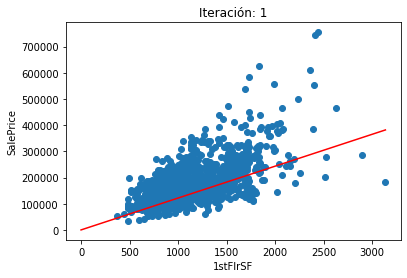

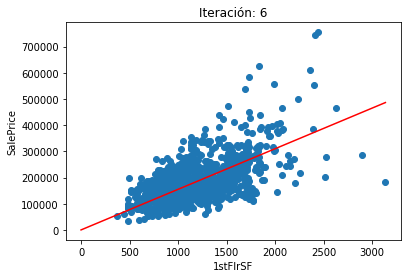

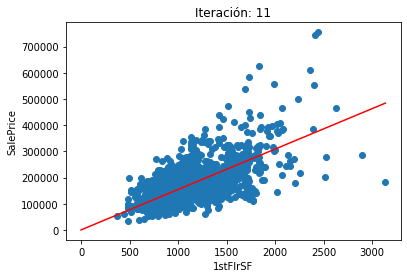

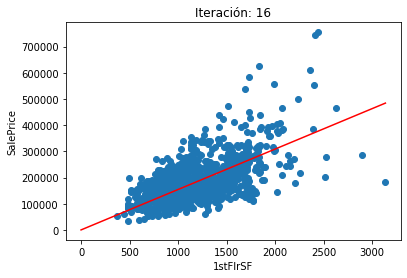

In [175]:
grafico_regresion(data_entrenamiento['1stFlrSF'], data_entrenamiento['SalePrice'], y_floor, 5)

Utilizar las funciones del punto anterior para entrenar modelos de regresión lineal y=mx +  b , para cada una de las variables “x” elegidas, basándose en las  funcionespara graficar las curvas de aprendizaje  y comparación del modelo vs los datos elegirel número de “epochs” o iteraciones a entrenar el modelo (y experimentar con el learning_rate)

Criterio: El error debe disminuir lo más posible por lo cual la curva de aprendizajedebe disminuir hasta que ya no disminuya mucho (se estabilice o converja ) , si elerror baja y comienza a subir debemos usar menos iteraciones.

In [193]:
SalePrice = pd.DataFrame(data_entrenamiento['SalePrice'])

In [223]:
OverallQual = pd.DataFrame(data_entrenamiento['OverallQual'])
modelo_OverallQual = LinearRegression().fit(OverallQual, SalePrice)

In [224]:
FirstFlrSF = pd.DataFrame(data_entrenamiento['1stFlrSF'])
modelo_1stFlrSF = LinearRegression().fit(FirstFlrSF, SalePrice)

## Comparación de modelos
Para cada variable independiente x elegida, crear una función que usando el **modelo entrenado manualmente** y el **modelo de scikit-learn** (enviados como parámetros a la funcion). Calcule la estimación o predicción de cada uno de estos y devuelva como resultado una predicción estimada promediando las predicciones de los 2 modelos, la función debe recibir como parámetro adicional un **vector de cualquier tamaño de x** y devolver 3 vectores cada uno del mismo tamaño del vector x.
* La predicción con el modelo entrenado manualmente
* La predicción con el modelo de scikit-learn
* La combinación(promedio) de las 2 anteriores.

In [227]:
def prediccion(modelo_sk, modelo_manual, test):
    prediccion_sk = modelo_sk.predict(pd.DataFrame(test))
    prediccion_sk = np.reshape(prediccion_sk, len(test))
    
    prediccion_manual = np.array(modelo_manual[len(modelo_manual)][0] * test + modelo_manual[len(modelo_manual)][1])
    promedio = (prediccion_sk + prediccion_manual) * 0.5
    
    return prediccion_sk, prediccion_manual, promedio

In [228]:
prediccion_sk_overallQual, prediccion_manual_overalQual, promedio_overallQual = prediccion(modelo_OverallQual, y_overall, data_validacion['OverallQual'])

prediccion_sk_floor, prediccion_manual_floor, promedio_floor = prediccion(modelo_1stFlrSF, y_floor, data_validacion['1stFlrSF'])

In [229]:
def calcula_error(x, y):
    error = 0.5 * (np.mean((x - y)**2))
    return error

Usando el 20% de los datos de validación, aplicamos los modelos predictivos paraestimar la variable dependiente  y usando los valores reales de “y” calculamos el error de cada modelo. Para cada variable independiente “x” elegida:
* Graficar el  error de cada modelo para esta variable “x”
* Concluir cuál modelo para la  variable “x” es el mejor a ser usado

In [230]:
error_sk_overallQual = calcula_error(prediccion_sk_overallQual, data_validacion['SalePrice'])
error_manual_overallQual = calcula_error(prediccion_manual_overalQual, data_validacion['SalePrice'])

error_sk_floor = calcula_error(prediccion_sk_floor, data_validacion['SalePrice'])
error_manual_floor = calcula_error(prediccion_manual_floor, data_validacion['SalePrice'])

errores_sk = [error_sk_overallQual, error_sk_floor]
errores_manual = [error_manual_overallQual, error_manual_floor]

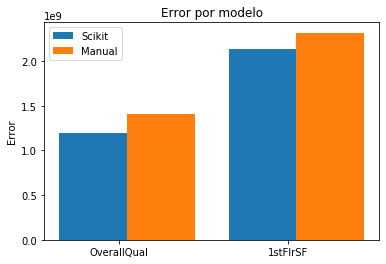

In [236]:
fig, ax = plt.subplots()
width = 0.4
r1 = np.arange(len(errores_sk))
r2 = [x + width for x in r1]

bars1 = ax.bar(r1, errores_sk, width, label = 'Scikit')
bars2 = ax.bar(r2, errores_manual, width, label = 'Manual')

ax.set_xticks(r1 + 0.15)
ax.set_xticklabels(('OverallQual', '1stFlrSF'))
ax.set_ylabel('Error')
ax.set_title('Error por modelo')
ax.legend()

plt.show()

## Conclusión
El mejor modelo (el más adaptado a la data de validación) es el obtenido por **ScikitLearn**